In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from os import getcwd
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
path_sonnets = f"{getcwd()}/../tmp2/sonnets.txt"
data = open(path_sonnets).read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [3]:
model = Sequential()
model.add(Embedding(total_words,
                    100,
                    input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, kernel_regularizer='l2'))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation="softmax"))# A Dense Layer)
# Pick an optimizer
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy',
              metrics=["accuracy"]
             )
          # Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors, 
                     label, 
                     epochs=50, 
                     batch_size=128, 
                     verbose=1)

Train on 15462 samples
Epoch 1/50
15462/15462 [==============================] - 22s 1ms/sample - loss: 7.3395 - accuracy: 0.0215
Epoch 2/50
15462/15462 [==============================] - 9s 576us/sample - loss: 6.5622 - accuracy: 0.0229
Epoch 3/50
15462/15462 [==============================] - 9s 588us/sample - loss: 6.4568 - accuracy: 0.0255
Epoch 4/50
15462/15462 [==============================] - 9s 570us/sample - loss: 6.3498 - accuracy: 0.0316
Epoch 5/50
15462/15462 [==============================] - 9s 575us/sample - loss: 6.2598 - accuracy: 0.0354
Epoch 6/50
15462/15462 [==============================] - 9s 569us/sample - loss: 6.1832 - accuracy: 0.0387
Epoch 7/50
15462/15462 [==============================] - 9s 556us/sample - loss: 6.0786 - accuracy: 0.0449
Epoch 8/50
15462/15462 [==============================] - 9s 556us/sample - loss: 5.9570 - accuracy: 0.0501
Epoch 9/50
15462/15462 [==============================] - 9s 575us/sample - loss: 5.8527 - accuracy: 0.0556
Epoch 

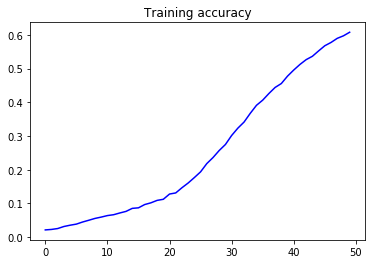

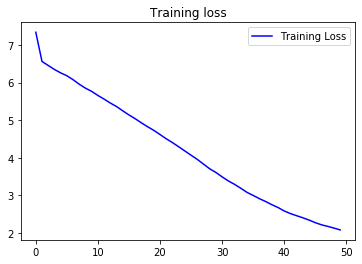

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope where i was belong done thee ' me near so report dote hence 'greeing slain room room hence ' hence hence ' hence hence may room room room room room room room room hence ' light light skill possession still me so thine untutor'd thine ' used near weep ' dumb near hence weep ' live so still you best was you you so thine ' foes old same thee so such men hence prove thine ' hence hence ' hence room room room hence room room room room room room hence ' live ' die thee so so thine


In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);